In [ ]:
!pip install pykrx
from pykrx import stock

In [177]:
import datetime as dt

end = dt.datetime.today().date().strftime("%Y%m%d")
start = (dt.datetime.today().date() - dt.timedelta(365*3)).strftime("%Y%m%d")
# end = dt.datetime(2022,12,31).strftime("%Y%m%d")
# start = (dt.datetime(2022,12,31) - dt.timedelta(180)).strftime("%Y%m%d")
print(start,end)

20200830 20230830


In [178]:
import pandas as pd
import numpy as np

tmp = pd.DataFrame()
ticker = "207940"  # "삼성바이오로직스" 종목의 코드
tmp['close'] = stock.get_market_ohlcv(start, end, ticker)['종가']
tmp

,close
날짜,
2020-08-31,768895
2020-09-01,771860
2020-09-02,760988
2020-09-03,769883
2020-09-04,763953
...,...
2023-08-24,763000
2023-08-25,757000
2023-08-28,750000


In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def monte_carlo_simulation(tmp):
    np.random.seed(42) # 시드고정
    num_simulations = 1000 # 반복횟수
    num_days_per_year = 20 # 단기 예측

    # 초기 가격 설정
    initial_price = tmp['close'][-1]

    # 일일 수익률
    daily_returns = tmp['close'].pct_change().dropna()

    # 연간 수익률
    mean_return = daily_returns.mean()
    annual_return = ((1 + mean_return) ** num_days_per_year) - 1

    # 변동성 계산
    volatility = daily_returns.std() * np.sqrt(num_days_per_year)

    # 로그 수익률 시뮬레이션 생성
    log_returns = np.random.normal(
        (annual_return / num_days_per_year),
        (volatility / np.sqrt(num_days_per_year)),
        (num_days_per_year, num_simulations))

    # 로그 수익률을 이용해 주식 가격 시뮬레이션 생성
    price_simulations = initial_price * np.exp(np.cumsum(log_returns, axis=0))
    price_simulations_df = pd.DataFrame(price_simulations)

    # 시뮬레이션 결과 시각화
    plt.figure(figsize=(12, 6))
    for i in range(num_simulations):
        plt.plot(price_simulations_df.index, price_simulations_df.iloc[:, i], lw=0.5)

    plt.title('Monte Carlo 주식 시뮬레이션')
    plt.xlabel('날짜')
    plt.ylabel('주식가격')
    plt.show()

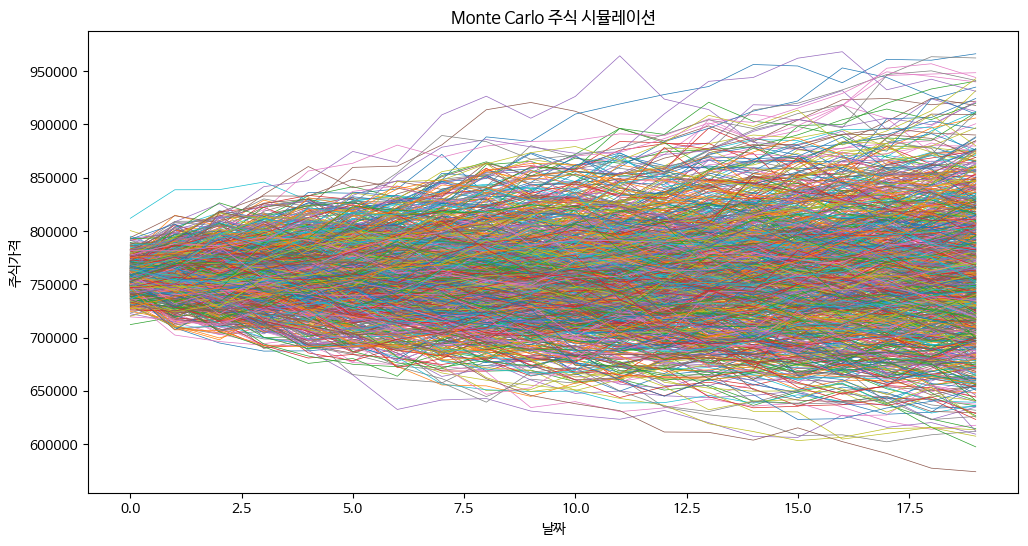

In [180]:
monte_carlo_simulation(tmp)

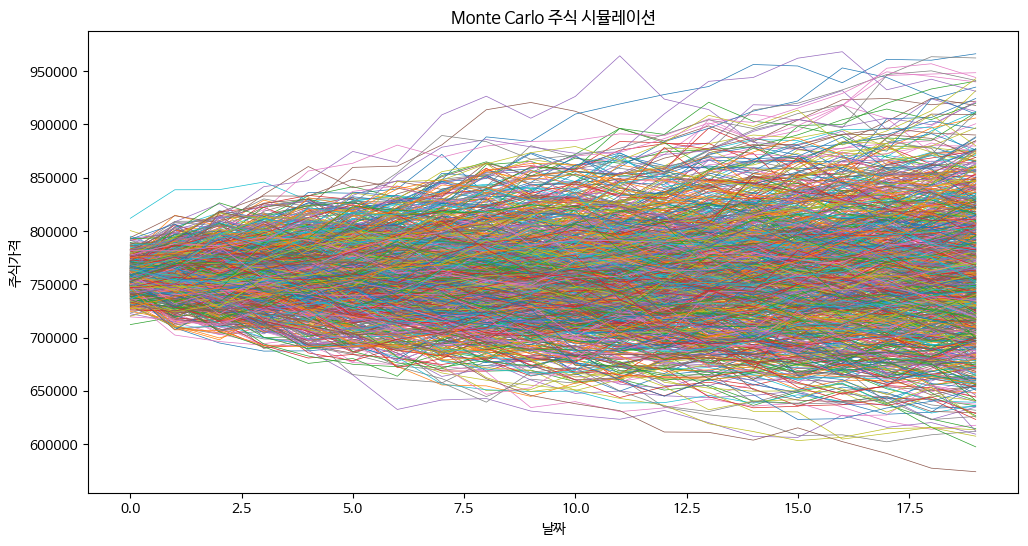

In [181]:
np.random.seed(42) # 시드고정
num_simulations = 1000 # 반복횟수
num_days_per_year = 20 # 단기 예측

# 초기 가격 설정
initial_price = tmp['close'][-1]

# 일일 수익률
daily_returns = tmp['close'].pct_change().dropna()

# 연간 수익률
mean_return = daily_returns.mean()
annual_return = ((1 + mean_return) ** num_days_per_year) - 1

# 변동성 계산
volatility = daily_returns.std() * np.sqrt(num_days_per_year)

# 로그 수익률 시뮬레이션 생성
log_returns = np.random.normal(
    (annual_return / num_days_per_year),
    (volatility / np.sqrt(num_days_per_year)),
    (num_days_per_year, num_simulations))

# 로그 수익률을 이용해 주식 가격 시뮬레이션 생성
price_simulations = initial_price * np.exp(np.cumsum(log_returns, axis=0))
price_simulations_df = pd.DataFrame(price_simulations)

# 시뮬레이션 결과 시각화
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(price_simulations_df.index, price_simulations_df.iloc[:, i], lw=0.5)

plt.title('Monte Carlo 주식 시뮬레이션')
plt.xlabel('날짜')
plt.ylabel('주식가격')
plt.show()

In [182]:
price_simulations_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,763082.987679,754181.760556,765214.782856,777692.707423,752846.626266,752846.854660,778500.505091,766909.862614,749580.087423,763729.714183,...,759028.166489,728115.943705,752665.465811,746642.375472,742245.435023,752193.811847,781649.699830,765117.991454,748172.695261,764153.527850
1,783187.065845,767290.966228,766170.981987,768564.152121,762734.884061,758452.169858,791601.661157,776078.104976,764371.674524,756324.550921,...,770451.038198,738444.043524,769496.967883,756590.062151,747191.188756,767328.973042,781381.528856,752861.552546,746031.286398,753818.058078
2,773590.208296,765357.113092,755144.884124,764315.243773,736615.799934,761559.263553,791735.614396,764560.836345,773853.743107,769654.962856,...,792461.227758,746815.706973,770635.167504,753739.804929,734270.938971,768541.269640,785227.377176,735891.376925,750762.618140,751768.946906
3,746903.484486,753395.953537,749505.598978,791562.400147,744339.759489,743104.998655,798995.744842,743119.462681,789607.689511,763095.822632,...,768220.728764,740449.303999,743120.439939,764386.285887,706883.288764,769058.502151,755761.315740,731656.292326,774024.441458,756906.817822
4,735188.490252,753072.317211,749865.336655,798623.082447,725881.777944,751396.878547,760160.581296,734628.171409,782630.461668,772192.142783,...,739098.551682,749966.823443,741654.645100,772547.300745,698451.194385,768475.878657,765874.461786,775090.195969,785783.728778,745247.352349
5,729561.333593,746898.889412,725499.181551,793883.309989,735886.285167,734019.157923,775145.627851,741388.449683,772197.309572,770288.480735,...,746589.346897,754335.695015,728205.659416,780103.524055,709789.791612,771027.917973,782476.817893,757960.028486,792724.309922,729411.603326
6,714800.813558,738350.137221,713083.911989,786000.418529,733087.725623,745571.723257,770672.368695,720086.831790,788753.352784,758576.713489,...,754857.466624,767982.557184,741154.378199,795851.320055,701666.883360,766908.430490,793792.191790,750719.643103,792765.981354,734914.108658
7,725354.005079,714595.301602,722670.509023,782728.118600,742843.205980,756463.834281,794030.580956,738431.541874,808744.536927,779199.870954,...,772027.776032,767750.778692,764056.124321,809436.336307,692655.900354,798990.412362,798720.417949,739332.261435,817473.265408,763791.296339
8,725018.007683,708079.690912,720478.161487,793250.798206,760704.271023,764592.758573,795641.403889,759269.052010,804201.049831,794302.412706,...,795326.528568,780622.668568,761987.762595,782879.101499,692510.428067,800609.919002,816254.522445,761466.614477,807309.938095,775296.913208
9,735453.144884,722370.762981,727254.894724,765395.048825,758634.150615,748547.487221,792784.699413,773257.446248,808867.344802,811452.684202,...,816797.161414,783504.281772,771481.928302,761608.628746,708066.067449,820212.174725,786778.625651,751717.154788,814859.367010,784699.050913


In [183]:
df = pd.DataFrame()

# 일일 수익률
daily_returns = price_simulations_df.pct_change()

# 연간 주식 수익률 --> 주식별 가중치 고려
df['annual_returns'] = ((1 + daily_returns.mean()) ** num_days_per_year) - 1

# 연간 리스크
df['annual_risk'] = daily_returns.std() * np.sqrt(num_days_per_year)

In [187]:
# 무위험 이자율을 설정
rf = 0.035 # 금리 or 정기 예금 or 정부 채권의 연간 수익률

# 샤프 지수 계산
df['SharpeRatio'] = (df['annual_returns'] - rf) / df['annual_risk']

# 샤프 지수의 중앙값 포트폴리오의 정보를 가져옵니다.
#med_sharpe_portfolio = df[df['SharpeRatio'] == df['SharpeRatio'].median()]
med_sharpe_portfolio = df[df['SharpeRatio'] == df['SharpeRatio'].iloc[384]]

# 샤프 지수, 연간 수익률, 연간 리스크를 출력합니다.
print("포트폴리오의 샤프 지수:", med_sharpe_portfolio['SharpeRatio'].values[0])
print("포트폴리오의 연간 수익률:", med_sharpe_portfolio['annual_returns'].values[0])
print("포트폴리오의 연간 리스크:", med_sharpe_portfolio['annual_risk'].values[0])

포트폴리오의 샤프 지수: -0.32692301317817823
포트폴리오의 연간 수익률: 0.011621043718525792
포트폴리오의 연간 리스크: 0.07151211551060895


In [186]:
df['SharpeRatio'].sort_values().reset_index().iloc[500]

index          384.000000
SharpeRatio     -0.326923
Name: 500, dtype: float64

In [185]:
df['SharpeRatio'].median()

-0.3283047814875203